In [1]:
import numpy as np
import pandas as pd

In [5]:
# 라이브러리 임포트 및 기본 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # Windows
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 기호 깨짐 방지
plt.rcParams['figure.dpi'] = 100                # 그래프 해상도

In [141]:
import pandas as pd

# 함수 정의
def load_weather_csv(file_path):
    start_row = None
    with open(file_path, encoding='cp949') as f:
        for i, line in enumerate(f):
            if '지점번호' in line:
                start_row = i
                break
    
    df = pd.read_csv(file_path, encoding='cp949', skiprows=start_row, engine='python')
    df.columns = df.columns.str.strip().str.replace('"', '')
    df['일시'] = pd.to_datetime(df['일시'].astype(str).str.strip(), errors='coerce')
    df = df.dropna(subset=['일시']).sort_values('일시').reset_index(drop=True)
    
    return df

# 파일 로드
weather_67 = load_weather_csv('seoul_weather_6~7.csv')
weather_45 = load_weather_csv('seoul_weather_4~5.csv')

print("\n장마철 강수량:")
print(weather_67.head())

print("\n비장마철 강수량:")
print(weather_45.head())


장마철 강수량:
   지점번호 지점명         일시  강수량(mm)  일최다강수량(mm)    일최다강수량일자  1시간최다강수량(mm)  \
0   108  서울 2020-06-01    139.6        64.7  2020-06-30          15.9   
1   108  서울 2020-07-01    270.4       103.1  2020-07-23          27.1   
2   108  서울 2021-06-01    104.6        38.2  2021-06-27          37.7   
3   108  서울 2021-07-01    168.3        67.4  2021-07-19          65.7   
4   108  서울 2022-06-01    393.8       176.2  2022-06-30          34.4   

   1시간최다강수량일자  Unnamed: 8  
0  2020-06-30         NaN  
1  2020-07-29         NaN  
2  2021-06-27         NaN  
3  2021-07-19         NaN  
4  2022-06-23         NaN  

비장마철 강수량:
   지점번호 지점명         일시  강수량(mm)  일최다강수량(mm)    일최다강수량일자  1시간최다강수량(mm)  \
0   108  서울 2020-04-01     16.9        10.3  2020-04-19           3.9   
1   108  서울 2020-05-01    112.4        29.8  2020-05-18          19.8   
2   108  서울 2021-04-01    124.1        56.2  2021-04-03          11.5   
3   108  서울 2021-05-01    183.1        66.9  2021-05-16          11.3   
4   108

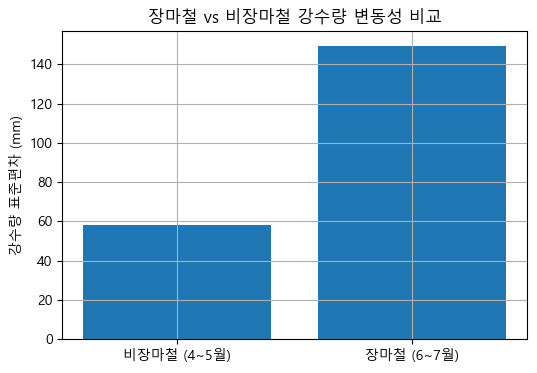

In [64]:
import matplotlib.pyplot as plt

# 1️⃣ 표준편차 계산
std_45 = weather_45['강수량(mm)'].std()
std_67 = weather_67['강수량(mm)'].std()

# 2️⃣ 막대그래프
plt.figure(figsize=(6, 4))

plt.bar(
    ['비장마철 (4~5월)', '장마철 (6~7월)'],
    [std_45, std_67]
)

plt.title('장마철 vs 비장마철 강수량 변동성 비교')
plt.ylabel('강수량 표준편차 (mm)')
plt.grid(True)

plt.show()


In [10]:
import pandas as pd

# 함수 정의
def load_weather_csv(file_path):
    start_row = None
    with open(file_path, encoding='cp949') as f:
        for i, line in enumerate(f):
            if '지점번호' in line:
                start_row = i
                break
    
    df = pd.read_csv(file_path, encoding='cp949', skiprows=start_row, engine='python')
    df.columns = df.columns.str.strip().str.replace('"', '')
    df['일시'] = pd.to_datetime(df['일시'].astype(str).str.strip(), errors='coerce')
    df = df.dropna(subset=['일시']).sort_values('일시').reset_index(drop=True)
    
    return df

# 파일 로드
weather_67 = load_weather_csv('seoul_weather_6~7.csv')
weather_45 = load_weather_csv('seoul_weather_4~5.csv')

print("\n장마철 강수량:")
print(weather_67.head())

print("\n비장마철 강수량:")
print(weather_45.head())


장마철 강수량:
   지점번호 지점명         일시  강수량(mm)  일최다강수량(mm)    일최다강수량일자  1시간최다강수량(mm)  \
0   108  서울 2020-06-01    139.6        64.7  2020-06-30          15.9   
1   108  서울 2020-07-01    270.4       103.1  2020-07-23          27.1   
2   108  서울 2021-06-01    104.6        38.2  2021-06-27          37.7   
3   108  서울 2021-07-01    168.3        67.4  2021-07-19          65.7   
4   108  서울 2022-06-01    393.8       176.2  2022-06-30          34.4   

   1시간최다강수량일자  Unnamed: 8  
0  2020-06-30         NaN  
1  2020-07-29         NaN  
2  2021-06-27         NaN  
3  2021-07-19         NaN  
4  2022-06-23         NaN  

비장마철 강수량:
   지점번호 지점명         일시  강수량(mm)  일최다강수량(mm)    일최다강수량일자  1시간최다강수량(mm)  \
0   108  서울 2020-04-01     16.9        10.3  2020-04-19           3.9   
1   108  서울 2020-05-01    112.4        29.8  2020-05-18          19.8   
2   108  서울 2021-04-01    124.1        56.2  2021-04-03          11.5   
3   108  서울 2021-05-01    183.1        66.9  2021-05-16          11.3   
4   108

In [12]:
def load_solar_csv(file_path):
    start_row = None
    with open(file_path, encoding='cp949') as f:
        for i, line in enumerate(f):
            if '지점번호' in line:
                start_row = i
                break
    
    df = pd.read_csv(file_path, encoding='cp949', skiprows=start_row, engine='python')
    df.columns = df.columns.str.strip().str.replace('"', '')
    df['일시'] = pd.to_datetime(df['일시'].astype(str).str.strip(), errors='coerce')
    df = df.dropna(subset=['일시']).sort_values('일시').reset_index(drop=True)
    
    return df

solar_67 = load_solar_csv('seoul_solar_data_6~7.csv')
solar_45 = load_solar_csv('seoul_solar_data_4~5.csv') 

print("\n장마철 일사량:")
print(solar_67.head())  

print("\n비장마철 일사량:")
print(solar_45.head())


장마철 일사량:
   지점번호 지점명         일시  일조합(hr)  일조율(%)  일사합(MJ/m2)
0   108  서울 2020-06-01    206.1   46.62      603.98
1   108  서울 2020-07-01    119.4   26.62      464.55
2   108  서울 2021-06-01    185.5   41.96      563.35
3   108  서울 2021-07-01    195.2   43.51      578.30
4   108  서울 2022-06-01    131.9   29.83      440.59

비장마철 일사량:
   지점번호 지점명         일시  일조합(hr)  일조율(%)  일사합(MJ/m2)
0   108  서울 2020-04-01    283.3   71.59      637.52
1   108  서울 2020-05-01    177.9   40.38      564.83
2   108  서울 2021-04-01    208.6   52.74      558.28
3   108  서울 2021-05-01    203.7   46.25      570.50
4   108  서울 2022-04-01    246.4   62.35      615.24


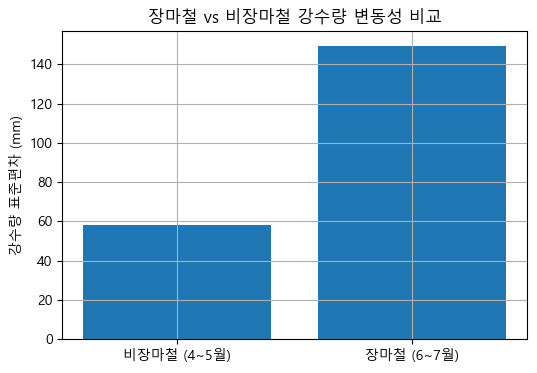

In [6]:
import matplotlib.pyplot as plt

# 1️⃣ 표준편차 계산
std_45 = weather_45['강수량(mm)'].std()
std_67 = weather_67['강수량(mm)'].std()

# 2️⃣ 막대그래프
plt.figure(figsize=(6, 4))

plt.bar(
    ['비장마철 (4~5월)', '장마철 (6~7월)'],
    [std_45, std_67]
)

plt.title('장마철 vs 비장마철 강수량 변동성 비교')
plt.ylabel('강수량 표준편차 (mm)')
plt.grid(True)

plt.show()

In [13]:
# MJ/m² → kWh/m² 변환
# 일사량 변환: MJ/m² × 0.2778 = kWh/m²
solar_67['일사량(kWh/m²)'] = solar_67['일사합(MJ/m2)'] * 0.2778
solar_45['일사량(kWh/m²)'] = solar_45['일사합(MJ/m2)'] * 0.2778

# 발전량 계산 (패널 20m², 효율 18%, 손실 20%)
solar_67['발전량(kWh)'] = solar_67['일사량(kWh/m²)'] * 20 * 0.18 * 0.8
solar_45['발전량(kWh)'] = solar_45['일사량(kWh/m²)'] * 20 * 0.18 * 0.8

# 전체 컬럼 확인
print("장마철:")
print(solar_67)

print("\n비장마철:")
print(solar_45)

장마철:
    지점번호 지점명         일시  일조합(hr)  일조율(%)  일사합(MJ/m2)  일사량(kWh/m²)    발전량(kWh)
0    108  서울 2020-06-01    206.1   46.62      603.98   167.785644  483.222655
1    108  서울 2020-07-01    119.4   26.62      464.55   129.051990  371.669731
2    108  서울 2021-06-01    185.5   41.96      563.35   156.498630  450.716054
3    108  서울 2021-07-01    195.2   43.51      578.30   160.651740  462.677011
4    108  서울 2022-06-01    131.9   29.83      440.59   122.395902  352.500198
5    108  서울 2022-07-01    140.1   31.22      508.79   141.341862  407.064563
6    108  서울 2023-06-01    195.1   44.13      572.17   158.948826  457.772619
7    108  서울 2023-07-01    146.1   32.55      478.80   133.010640  383.070643
8    108  서울 2024-06-01    285.6   64.60      714.52   198.493656  571.661729
9    108  서울 2024-07-01     96.3   21.48      402.43   111.795054  321.969756
10   108  서울 2025-06-01    191.2   43.25      565.72   157.157016  452.612206
11   108  서울 2025-07-01    174.9   38.99      538.53   149.

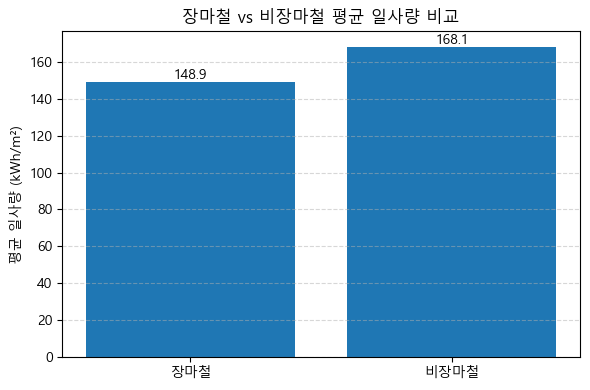

In [17]:


# 평균 일사량 계산 (컬럼명 정확히 일치시킴)
rainy_mean = solar_67['일사량(kWh/m²)'].mean()
dry_mean = solar_45['일사량(kWh/m²)'].mean()

# 그래프 그리기
plt.figure(figsize=(6,4))
plt.bar(['장마철', '비장마철'], [rainy_mean, dry_mean])
plt.ylabel('평균 일사량 (kWh/m²)')
plt.title('장마철 vs 비장마철 평균 일사량 비교')

# 값 표시
for i, v in enumerate([rainy_mean, dry_mean]):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.grid(
    True,
    axis="y",
    linestyle="--",
    alpha=0.5
)
plt.show()


In [11]:
# 장마철
merged_67 = pd.merge(
    weather_67[['일시', '강수량(mm)']],
    solar_67[['일시', '일사량(kWh/m²)', '발전량(kWh)', '일조합(hr)']],
    on='일시'
)

# 비장마철
merged_45 = pd.merge(
    weather_45[['일시', '강수량(mm)']],
    solar_45[['일시', '일사량(kWh/m²)', '발전량(kWh)', '일조합(hr)']],
    on='일시' # 같은 날짜끼리 붙이기
)

# 발전량 비교

print("="*30)
print("발전량 분석")
print("="*30)

avg_power_67 = merged_67['발전량(kWh)'].mean()
avg_power_45 = merged_45['발전량(kWh)'].mean()
power_loss = avg_power_45 - avg_power_67
loss_percent = (power_loss / avg_power_45) * 100

print(f"\n비장마철 평균 발전량: {avg_power_45:.0f} kWh")
print(f"장마철 평균 발전량: {avg_power_67:.0f} kWh")
print(f"→ 장마철 감소: {power_loss:.0f} kWh ({loss_percent:.1f}% 감소)")


발전량 분석

비장마철 평균 발전량: 484 kWh
장마철 평균 발전량: 429 kWh
→ 장마철 감소: 55 kWh (11.4% 감소)


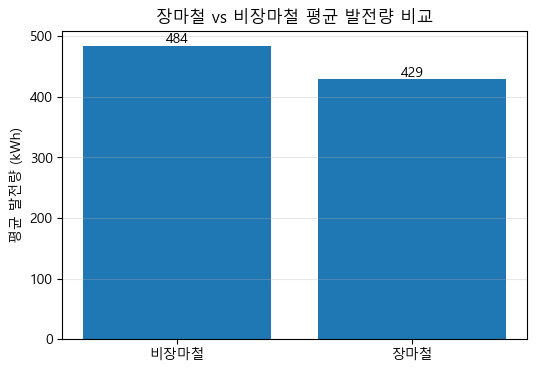

In [12]:
import matplotlib.pyplot as plt

labels = ['비장마철', '장마철']
values = [avg_power_45, avg_power_67]

plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.title("장마철 vs 비장마철 평균 발전량 비교")
plt.ylabel("평균 발전량 (kWh)")
plt.grid(axis='y', alpha=0.3)

# 수치 표시
for i, v in enumerate(values):
    plt.text(i, v, f"{v:.0f}", ha='center', va='bottom')

plt.show()


In [14]:
print("\n" + "="*30)
print("상관관계 분석")
print("="*30 + "\n")

# 장마철 상관관계
corr_67 = merged_67[['강수량(mm)', '발전량(kWh)']].corr().iloc[0, 1]
z_67 = np.polyfit(merged_67['강수량(mm)'], merged_67['발전량(kWh)'], 1)

# 비장마철 상관관계
corr_45 = merged_45[['강수량(mm)', '발전량(kWh)']].corr().iloc[0, 1]
z_45 = np.polyfit(merged_45['강수량(mm)'], merged_45['발전량(kWh)'], 1)

print(f"장마철 상관계수: {corr_67:.3f}")
print(f"  → 강수량 100mm ↑ → 발전량 {abs(z_67[0]*100):.0f}kWh ↓")
print(f"\n비장마철 상관계수: {corr_45:.3f}")
print(f"  → 강수량 100mm ↑ → 발전량 {abs(z_45[0]*100):.0f}kWh ↓")


상관관계 분석

장마철 상관계수: -0.825
  → 강수량 100mm ↑ → 발전량 37kWh ↓

비장마철 상관계수: -0.340
  → 강수량 100mm ↑ → 발전량 33kWh ↓


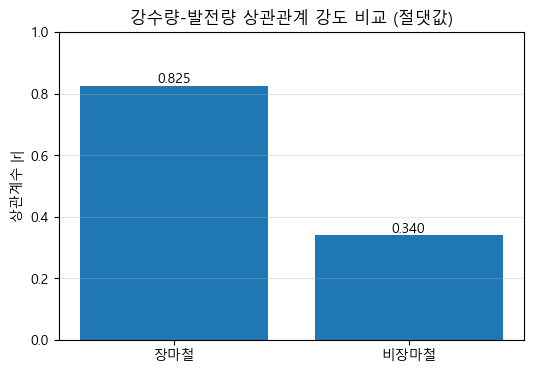

In [16]:
labels = ['장마철', '비장마철']
values = [abs(corr_67), abs(corr_45)]

plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.ylim(0, 1)

plt.title("강수량-발전량 상관관계 강도 비교 (절댓값)")
plt.ylabel("상관계수 |r|")
plt.grid(axis='y', alpha=0.3)

# 수치 표시
for i, v in enumerate(values):
    plt.text(i, v, f"{v:.3f}", ha='center', va='bottom')

plt.show()


In [118]:
print("\n" + "="*30)
print("ESS 필요 용량 (일반 가정 기준)")
print("="*30 + "\n")

PANEL_AREA = 20  # m²
MONTHLY_NEED = 400 # 4인 가족 평균 한 달 동안 필요한 전기량 = 400kWh
worst = merged_67.loc[merged_67['발전량(kWh)'].idxmin()] # 장마철 중에서 발전량이 가장 적었던 달
shortage = max(0, MONTHLY_NEED - worst['발전량(kWh)']) # 필요한 전기 - 만든 전기 = 부족한 전기
                                                       # max(0,...) -> max(0, -100) = 0 음수 대신 0출력, 부족하지 않으면 0으로
recommended = shortage * 1.2    # 부족량에 20% 여유분 추가
commercial = int(np.ceil(recommended / 10)) * 10 # 상용 제품 단위로 올림 (실제 제품: 10kWh, 20kWh, 30kWh...단위로 판매)

print(f"\n패널 면적: {PANEL_AREA}m² (약 15개)")
print(f"월 필요량: {MONTHLY_NEED} kWh (4인 가족)")
print(f"평균 발전량: {merged_67['발전량(kWh)'].mean():.0f} kWh")
print(f"최악 발전량: {worst['발전량(kWh)']:.0f} kWh ({worst['일시'].strftime('%Y년 %m월')})")
print(f"부족량: {shortage:.0f} kWh")
print(f"권장 ESS: {commercial} kWh")
print(f"예상 비용: 약 {commercial * 500000:,}원") # 용량 * 단가 = 총 비용
                                                 # 50만원은 ESS 배터리 시장 평균 단가


ESS 필요 용량 (일반 가정 기준)


패널 면적: 20m² (약 15개)
월 필요량: 400 kWh (4인 가족)
평균 발전량: 429 kWh
최악 발전량: 322 kWh (2024년 07월)
부족량: 78 kWh
권장 ESS: 100 kWh
예상 비용: 약 50,000,000원


In [18]:
# 장마철 정의 (한국 기준)
RAINY_MONTHS = [6, 7]

rainy_df = merged_67[
    merged_67['일시'].dt.month.isin(RAINY_MONTHS)
].copy()

PANEL_AREA = 20        # m²
MONTHLY_NEED = 400     # kWh (4인 가구 평균)

# 장마철 중 발전량이 가장 낮은 달
worst = rainy_df.loc[rainy_df['발전량(kWh)'].idxmin()]

# 부족 전력량
shortage = max(0, MONTHLY_NEED - worst['발전량(kWh)'])

# ESS 여유 20%
recommended = shortage * 1.2

# 상용 ESS 단위 (10kWh 단위)
commercial = int(np.ceil(recommended / 10) * 10)

print("\n" + "="*30)
print("장마철 기준 ESS 필요 용량")
print("="*30 + "\n")

print(f"패널 면적: {PANEL_AREA} m² (약 15평)")
print(f"월 평균 소비 전력: {MONTHLY_NEED} kWh")
print(f"장마철 평균 발전량: {rainy_df['발전량(kWh)'].mean():.0f} kWh")

print(
    f"장마철 최저 발전량: {worst['발전량(kWh)']:.0f} kWh "
    f"({worst['일시'].strftime('%Y년 %m월')})"
)

print(f"부족 전력량: {shortage:.0f} kWh")
print(f"권장 ESS 용량: {commercial} kWh")
print(f"예상 ESS 비용: 약 {commercial * 500000:,} 원")
avg_rainy = rainy_df['발전량(kWh)'].mean()
shortage_avg = max(0, MONTHLY_NEED - avg_rainy)
recommended_avg = shortage_avg * 1.2
commercial_avg = int(np.ceil(recommended_avg / 10) * 10)

print("\n[장마철 평균 기준 ESS]")
print(f"평균 부족량: {shortage_avg:.0f} kWh")
print(f"권장 ESS 용량: {commercial_avg} kWh")




장마철 기준 ESS 필요 용량

패널 면적: 20 m² (약 15평)
월 평균 소비 전력: 400 kWh
장마철 평균 발전량: 429 kWh
장마철 최저 발전량: 322 kWh (2024년 07월)
부족 전력량: 78 kWh
권장 ESS 용량: 100 kWh
예상 ESS 비용: 약 50,000,000 원

[장마철 평균 기준 ESS]
평균 부족량: 0 kWh
권장 ESS 용량: 0 kWh


In [22]:
import numpy as np

# ===============================
# 기본 설정
# ===============================
PANEL_AREA = 20        # m²
MONTHLY_NEED = 400     # kWh (4인 가구 평균)
ESS_UNIT = 10          # 상용 ESS 단위 (kWh)
ESS_PRICE = 500_000    # kWh 당 가격 (원)

# ===============================
# ESS 계산 함수 (공통)
# ===============================
def calc_ess(df, label):
    worst = df.loc[df['발전량(kWh)'].idxmin()]
    
    shortage = max(0, MONTHLY_NEED - worst['발전량(kWh)'])
    recommended = shortage * 1.2
    commercial = int(np.ceil(recommended / ESS_UNIT) * ESS_UNIT)

    return {
        "구분": label,
        "평균발전량": df['발전량(kWh)'].mean(),
        "최저발전량": worst['발전량(kWh)'],
        "최저월": worst['일시'],
        "부족량": shortage,
        "ESS용량": commercial,
        "비용": commercial * ESS_PRICE
    }
result_rainy = calc_ess(merged_67, "장마철")
result_non_rainy = calc_ess(merged_45, "비장마철")
print("\n" + "=" * 45)
print("장마철 / 비장마철 ESS 필요 용량 비교")
print("=" * 45)

for r in [result_rainy, result_non_rainy]:
    print(f"\n[{r['구분']}]")
    print(f"평균 발전량: {r['평균발전량']:.0f} kWh")
    print(
        f"최저 발전량: {r['최저발전량']:.0f} kWh "
        f"({r['최저월'].strftime('%Y년 %m월')})"
    )
    print(f"부족 전력량: {r['부족량']:.0f} kWh")
    print(f"권장 ESS 용량: {r['ESS용량']} kWh")
    print(f"예상 ESS 비용: 약 {r['비용']:,} 원")



장마철 / 비장마철 ESS 필요 용량 비교

[장마철]
평균 발전량: 429 kWh
최저 발전량: 322 kWh (2024년 07월)
부족 전력량: 78 kWh
권장 ESS 용량: 100 kWh
예상 ESS 비용: 약 50,000,000 원

[비장마철]
평균 발전량: 484 kWh
최저 발전량: 398 kWh (2023년 04월)
부족 전력량: 2 kWh
권장 ESS 용량: 10 kWh
예상 ESS 비용: 약 5,000,000 원


In [23]:

import numpy as np
import pandas as pd

# ==================================================
# 1. 기본 설정
# ==================================================
PANEL_AREA = 20        # m²
MONTHLY_NEED = 400     # kWh (4인 가구 평균 월 소비)
ESS_UNIT = 10          # 상용 ESS 단위 (kWh)
ESS_PRICE = 500_000    # kWh 당 가격 (원)

# 날짜 타입 보장 (안전)
merged_67['일시'] = pd.to_datetime(merged_67['일시'])
merged_45['일시'] = pd.to_datetime(merged_45['일시'])

# ==================================================
# 2. 공통 ESS 계산 함수
# ==================================================
def calc_ess(df, label):
    worst = df.loc[df['발전량(kWh)'].idxmin()]

    shortage = max(0, MONTHLY_NEED - worst['발전량(kWh)'])
    recommended = shortage * 1.2
    commercial = int(np.ceil(recommended / ESS_UNIT) * ESS_UNIT)

    result = {
        "구분": label,
        "평균발전량": df['발전량(kWh)'].mean(),
        "최저발전량": worst['발전량(kWh)'],
        "최저월": worst['일시'],
        "부족량": shortage,
        "ESS용량": commercial,
        "비용": commercial * ESS_PRICE
    }

    return result

# ==================================================
# 3. 장마철 / 비장마철 ESS 계산
# ==================================================
rainy_result = calc_ess(merged_67, "장마철")
non_rainy_result = calc_ess(merged_45, "비장마철")

# ==================================================
# 4. 결과 출력 (전체 기간 기준)
# ==================================================
print("\n" + "=" * 50)
print("장마철 / 비장마철 ESS 필요 용량 (전체 기간)")
print("=" * 50)

for r in [rainy_result, non_rainy_result]:
    print(f"\n[{r['구분']}]")
    print(f"평균 발전량: {r['평균발전량']:.0f} kWh")
    print(
        f"최저 발전량: {r['최저발전량']:.0f} kWh "
        f"({r['최저월'].strftime('%Y년 %m월')})"
    )
    print(f"부족 전력량: {r['부족량']:.0f} kWh")
    print(f"권장 ESS 용량: {r['ESS용량']} kWh")
    print(f"예상 ESS 비용: 약 {r['비용']:,} 원")

# ==================================================
# 5. 연도별 ESS 계산 함수
# ==================================================
def calc_ess_by_year(df, season_label):
    results = []

    for year in sorted(df['일시'].dt.year.unique()):
        yearly_df = df[df['일시'].dt.year == year]

        res = calc_ess(yearly_df, f"{year}년 {season_label}")
        res["연도"] = year
        results.append(res)

    return results

# ==================================================
# 6. 연도별 ESS 계산 실행
# ==================================================
rainy_yearly = calc_ess_by_year(merged_67, "장마철")
non_rainy_yearly = calc_ess_by_year(merged_45, "비장마철")

# ==================================================
# 7. 연도별 결과 출력
# ==================================================
print("\n" + "=" * 50)
print("연도별 ESS 필요 용량")
print("=" * 50)

print("\n[장마철]")
for r in rainy_yearly:
    print(
        f"{r['연도']}년 → "
        f"ESS {r['ESS용량']} kWh "
        f"(부족 {r['부족량']:.0f} kWh)"
    )

print("\n[비장마철]")
for r in non_rainy_yearly:
    print(
        f"{r['연도']}년 → "
        f"ESS {r['ESS용량']} kWh "
        f"(부족 {r['부족량']:.0f} kWh)"
    )

# ==================================================
# 8. 해석 요약
# ==================================================
print("\n" + "=" * 50)
print("해석 요약")
print("=" * 50)

if rainy_result["ESS용량"] > non_rainy_result["ESS용량"]:
    print("▶ 장마철에 ESS 필요 용량이 더 큼 → 장마 영향이 뚜렷함")
elif rainy_result["ESS용량"] < non_rainy_result["ESS용량"]:
    print("▶ 비장마철에 ESS 필요 용량이 더 큼")
else:
    print("▶ 장마철과 비장마철 ESS 필요 용량 차이 없음")



장마철 / 비장마철 ESS 필요 용량 (전체 기간)

[장마철]
평균 발전량: 429 kWh
최저 발전량: 322 kWh (2024년 07월)
부족 전력량: 78 kWh
권장 ESS 용량: 100 kWh
예상 ESS 비용: 약 50,000,000 원

[비장마철]
평균 발전량: 484 kWh
최저 발전량: 398 kWh (2023년 04월)
부족 전력량: 2 kWh
권장 ESS 용량: 10 kWh
예상 ESS 비용: 약 5,000,000 원

연도별 ESS 필요 용량

[장마철]
2020년 → ESS 40 kWh (부족 28 kWh)
2021년 → ESS 0 kWh (부족 0 kWh)
2022년 → ESS 60 kWh (부족 47 kWh)
2023년 → ESS 30 kWh (부족 17 kWh)
2024년 → ESS 100 kWh (부족 78 kWh)
2025년 → ESS 0 kWh (부족 0 kWh)

[비장마철]
2020년 → ESS 0 kWh (부족 0 kWh)
2021년 → ESS 0 kWh (부족 0 kWh)
2022년 → ESS 0 kWh (부족 0 kWh)
2023년 → ESS 10 kWh (부족 2 kWh)
2024년 → ESS 0 kWh (부족 0 kWh)
2025년 → ESS 0 kWh (부족 0 kWh)

해석 요약
▶ 장마철에 ESS 필요 용량이 더 큼 → 장마 영향이 뚜렷함


In [10]:
print(solar_67.columns)
print(solar_45.columns)


Index(['지점번호', '지점명', '일시', '일조합(hr)', '일조율(%)', '일사합(MJ/m2)', '일사량(kWh/m²)',
       '발전량(kWh)'],
      dtype='object')
Index(['지점번호', '지점명', '일시', '일조합(hr)', '일조율(%)', '일사합(MJ/m2)', '일사량(kWh/m²)',
       '발전량(kWh)'],
      dtype='object')
